# Linear Regression - Iterative solution

## We begin by downloading all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets.samples_generator import make_regression

## Implementing the gradient_descent function

In [2]:
def gradient_descent_iterate(alpha, x, y, ep, max_iter):
    
    # Set-up of variables
    converged = False
    iter = 0
    m = x.shape[0]
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])
    
    # Calculate the mean squared error
    J = (1/2*m)*sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
    
    # Calculate and update the gradient
    while(not converged):
        # for each iteration, compute the gradient
        grad0 = (1/m) * sum([(t0 + t1*x[i] - y[i]) for i in range(m)])
        grad1 = (1/m) * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])
        # Save to temp
        temp0 = t0 - alpha*grad0
        temp1 = t1 - alpha*grad1
        # Update theta
        t0 = temp0
        t1 = temp1
        
        #Calculate MSE in each iteration
        e = (1/2*m)*sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
        #Check for early convergence
        if(abs(J-e)<=ep):
            print('Optimizer has converged, iterations',iter,'!')
            converged = True
        #Update error
        J = e
        iter = iter+1
        #End algorithm after max_iter iterations
        if (iter == max_iter):
            print('Maximum iterations exceeded')
            converged = True
    return t0, t1

## Generating and visualizing test data

In [3]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=10) 

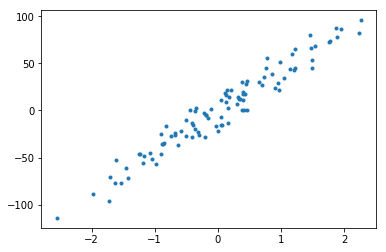

In [4]:
plt.plot(x,y, '.')

## Set-up variables and fit theta0 and theta1 to the data

In [5]:
alpha = 0.01
ep = 0.01
max_iter = 1000

theta0, theta1 = gradient_descent_iterate(alpha, x, y, ep, max_iter)
print('Theta0 = ',theta0,', Theta1 = ', theta1)

Optimizer has converged, iterations 836 !
Theta0 =  [-0.80943743] , Theta1 =  [ 42.61037278]


## Visualise our model and predictions

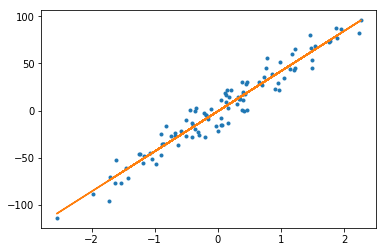

In [6]:
m = x.shape[0]
prediction = []
for i in range(m):
    prediction.append(theta0 + theta1*x[i])

plt.plot(x, y, '.', x, prediction)

# Linear Regression - Matrix solution

## We begin by downloading all necessary libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets.samples_generator import make_regression

## Implementing the gradient_descent function

In [8]:
def gradient_descent_matrix(alpha, x, y, iterations):
    m = x.shape[0]
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(iterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / 2*m
        if(iter%100 == 0):
            print("iter %s | J: %.3f" % (iter, J))   
        gradient = 1/m * np.dot(x_transpose, loss)       
        theta = theta - alpha * gradient  # update
    return theta

## Generating and visualizing test data

In [9]:
x_init, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=10) 

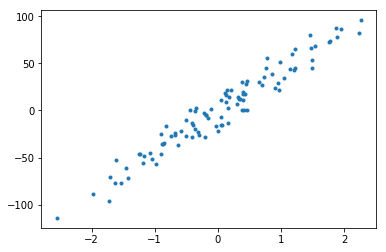

In [10]:
plt.plot(x_init,y, '.')

## Set-up variables and fit theta to the data

In [11]:
m, n = np.shape(x_init)
x = np.c_[ np.ones(m), x_init]
alpha = 0.01
theta = gradient_descent_matrix(alpha, x, y, 1000)

iter 0 | J: 9371092.929
iter 100 | J: 1716778.688
iter 200 | J: 722320.372
iter 300 | J: 591174.975
iter 400 | J: 573621.757
iter 500 | J: 571238.538
iter 600 | J: 570910.607
iter 700 | J: 570864.930
iter 800 | J: 570858.498
iter 900 | J: 570857.584


## Visualise our model and predictions

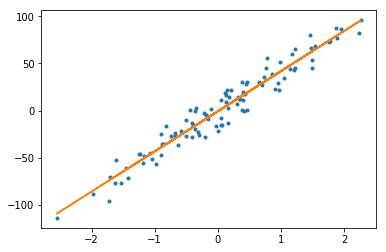

In [12]:
m = x.shape[0]
prediction = []
for i in range(m):
    prediction.append(theta[0] + theta[1]*x[i][1])

plt.plot(x_init, y, '.', x[:,1], prediction)

# Linear Regression - Normal equation


## We begin by downloading all necessary libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets.samples_generator import make_regression

## Generating and visualizing test data

In [14]:
x_init, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=10) 

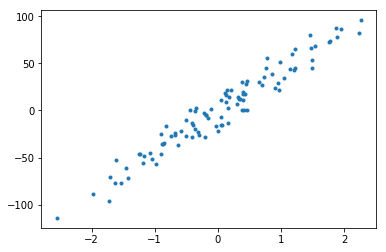

In [15]:
plt.plot(x_init,y, '.')

## Set-up the feature matrix and calculate theta

In [16]:
x = np.c_[ np.ones(m), x_init]

# Use formula theta = ((X'X)^-1)X'y

In [17]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(x.transpose(),x)), x.transpose()), y)
theta

array([ -0.81418183,  42.61943029])

## Visualise our model and predictions

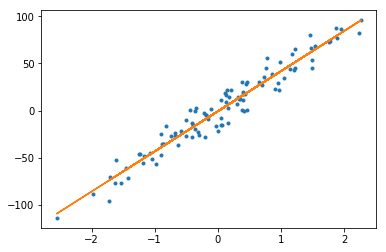

In [18]:
m = x.shape[0]
prediction = []
for i in range(m):
    prediction.append(theta[0] + theta[1]*x[i][1])

plt.plot(x_init, y, '.', x[:,1], prediction)